In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

def ignore_warn(*args, **kwargs):
    pass

# ignore annoying warning (from sklearn and seaborn)
warnings.warn = ignore_warn
# Increasing width to 100% on my PC
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import datetime as dt
from datetime import datetime

## Analysis

In [2]:
df = pd.read_csv('C:\\Users\\Admin\\Desktop\\Riskworx\\Paper\\Notebooks\\cleaned_df.csv', low_memory=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345310 entries, 0 to 1345309
Data columns (total 16 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   loan_amnt             1345310 non-null  float64
 1   term                  1345310 non-null  int64  
 2   int_rate              1345310 non-null  float64
 3   installment           1345310 non-null  float64
 4   grade                 1345310 non-null  int64  
 5   loan_status           1345310 non-null  object 
 6   purpose               1345310 non-null  int64  
 7   dti                   1345310 non-null  float64
 8   open_acc              1345310 non-null  float64
 9   pub_rec               1345310 non-null  float64
 10  revol_bal             1345310 non-null  float64
 11  revol_util            1345310 non-null  float64
 12  mort_acc              1345310 non-null  float64
 13  pub_rec_bankruptcies  1345310 non-null  float64
 14  log_income            1345310 non-

In [4]:
df.head()

,loan_amnt,term,int_rate,installment,grade,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,log_income,issue_d
0,3600.000,0,13.990,123.030,2,Fully Paid,2,5.910,7.000,0.000,2765.000,0.297,1.000,0.000,4.740,Dec-2015
1,24700.000,0,11.990,820.280,2,Fully Paid,11,16.060,22.000,0.000,21470.000,0.192,4.000,0.000,4.813,Dec-2015
2,20000.000,1,10.780,432.660,1,Fully Paid,4,10.780,6.000,0.000,7869.000,0.562,5.000,0.000,4.799,Dec-2015
3,10400.000,1,22.450,289.910,5,Fully Paid,6,25.370,12.000,0.000,21929.000,0.645,6.000,0.000,5.019,Dec-2015
4,11950.000,0,13.440,405.180,2,Fully Paid,2,10.200,5.000,0.000,8822.000,0.684,0.000,0.000,4.531,Dec-2015


In [5]:
#make datettime object
df['issue_d'] = pd.to_datetime(df['issue_d'])

df.sort_values(by='issue_d',
                   axis=0,
                   ascending=True,
                   inplace=True,
                   na_position='first')

#check data
df.head()

,loan_amnt,term,int_rate,installment,grade,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,log_income,issue_d
957957,7500.000,0,13.750,255.430,4,Fully Paid,2,14.290,7.000,0.000,4175.000,0.515,1.000,0.000,4.342,2007-06-01
957922,3500.000,0,10.280,113.390,2,Fully Paid,8,1.500,17.000,0.000,1882.000,0.324,1.000,0.000,4.301,2007-07-01
957923,5750.000,0,7.430,178.690,0,Fully Paid,2,0.270,10.000,0.000,2817.000,0.102,1.000,0.000,5.097,2007-07-01
957924,5000.000,0,7.430,155.380,0,Fully Paid,0,2.550,4.000,0.000,2562.000,0.140,1.000,0.000,4.602,2007-07-01
957930,1200.000,0,11.540,39.600,2,Fully Paid,1,2.040,3.000,0.000,1153.000,0.758,1.000,0.000,4.301,2007-07-01


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1345310 entries, 957957 to 895725
Data columns (total 16 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   loan_amnt             1345310 non-null  float64       
 1   term                  1345310 non-null  int64         
 2   int_rate              1345310 non-null  float64       
 3   installment           1345310 non-null  float64       
 4   grade                 1345310 non-null  int64         
 5   loan_status           1345310 non-null  object        
 6   purpose               1345310 non-null  int64         
 7   dti                   1345310 non-null  float64       
 8   open_acc              1345310 non-null  float64       
 9   pub_rec               1345310 non-null  float64       
 10  revol_bal             1345310 non-null  float64       
 11  revol_util            1345310 non-null  float64       
 12  mort_acc              1345310 non-null

In [7]:
df.describe()

,loan_amnt,term,int_rate,installment,grade,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,log_income
count,1345310.000,1345310.000,1345310.000,1345310.000,1345310.000,1345310.000,1345310.000,1345310.000,1345310.000,1345310.000,1345310.000,1345310.000,1345310.000,1345310.000
mean,14419.972,0.241,13.240,438.076,1.746,2.693,18.282,11.594,0.215,16248.115,0.518,1.591,0.134,4.813
std,8717.051,0.428,4.769,261.513,1.295,2.382,11.159,5.474,0.602,22328.169,0.245,1.779,0.378,0.248
min,500.000,0.000,5.310,4.930,0.000,0.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,8000.000,0.000,9.750,248.480,1.000,2.000,11.790,8.000,0.000,5943.000,0.335,0.000,0.000,4.661
50%,12000.000,0.000,12.740,375.430,2.000,2.000,17.610,11.000,0.000,11134.000,0.522,1.000,0.000,4.813
75%,20000.000,0.000,15.990,580.730,2.000,2.000,24.050,14.000,0.000,19755.750,0.707,3.000,0.000,4.954
max,40000.000,1.000,30.990,1719.830,6.000,13.000,999.000,90.000,86.000,2904836.000,8.923,6.000,12.000,7.041


We will take a note here to address the case of future leak. Let us see how many loans we issued each year. For the sake of this exerise let us assume we have all data points until the last 10%.

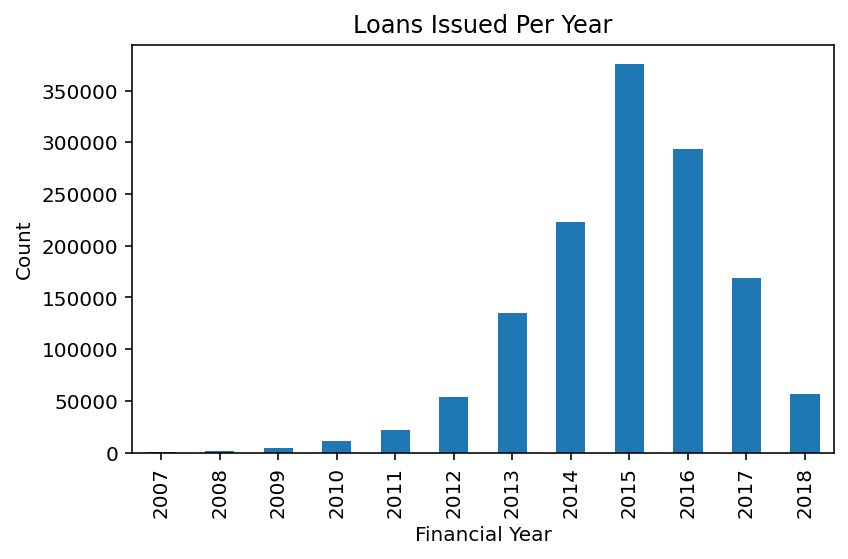

In [8]:
df['issue_d'].dt.year.value_counts().sort_index().plot.bar()
plt.title('Loans Issued Per Year')
plt.xlabel('Financial Year')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [9]:
df['issue_d'].isnull().any()

False

In [10]:
df['issue_d'].describe()

count                 1345310
unique                    139
top       2016-03-01 00:00:00
freq                    48937
first     2007-06-01 00:00:00
last      2018-12-01 00:00:00
Name: issue_d, dtype: object

There are 139 unique values. The first loans were issued in June 2007 and the last loans were issued in Dec 2018. The busiest month was March 2016, with 48937 loans funded in that month.

In [11]:
df[df['issue_d'] > dt.datetime(2014,1,1)].describe() #included 2014

,loan_amnt,term,int_rate,installment,grade,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,log_income
count,1101739.000,1101739.000,1101739.000,1101739.000,1101739.000,1101739.000,1101739.000,1101739.000,1101739.000,1101739.000,1101739.000,1101739.000,1101739.000,1101739.000
mean,14539.781,0.241,13.092,440.923,1.750,2.667,18.681,11.777,0.239,16345.614,0.507,1.591,0.146,4.817
std,8843.063,0.428,4.835,265.554,1.293,2.326,11.767,5.622,0.634,23047.069,0.245,1.783,0.395,0.252
min,1000.000,0.000,5.310,14.010,0.000,0.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,8000.000,0.000,9.440,248.300,1.000,2.000,12.040,8.000,0.000,5814.000,0.323,0.000,0.000,4.663
50%,12000.000,0.000,12.620,374.650,2.000,2.000,17.950,11.000,0.000,10964.000,0.507,1.000,0.000,4.813
75%,20000.000,0.000,15.610,587.170,2.000,2.000,24.580,15.000,0.000,19661.000,0.693,3.000,0.000,4.964
max,40000.000,1.000,30.990,1719.830,6.000,13.000,999.000,90.000,86.000,2904836.000,8.923,6.000,12.000,7.041


In [12]:
df[df['issue_d'] > dt.datetime(2015,1,1)].describe() #included 2015

,loan_amnt,term,int_rate,installment,grade,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,log_income
count,862035.000,862035.000,862035.000,862035.000,862035.000,862035.000,862035.000,862035.000,862035.000,862035.000,862035.000,862035.000,862035.000,862035.000
mean,14527.344,0.233,12.974,441.464,1.722,2.720,18.843,11.811,0.243,16329.719,0.495,1.549,0.149,4.819
std,8958.588,0.422,4.959,270.398,1.284,2.376,12.588,5.706,0.642,23413.691,0.246,1.747,0.398,0.258
min,1000.000,0.000,5.310,14.770,0.000,0.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,7600.000,0.000,9.170,244.680,1.000,2.000,12.060,8.000,0.000,5711.000,0.308,0.000,0.000,4.672
50%,12000.000,0.000,12.290,372.450,2.000,2.000,18.040,11.000,0.000,10832.000,0.491,1.000,0.000,4.813
75%,20000.000,0.000,15.610,589.980,2.000,2.000,24.780,15.000,0.000,19487.000,0.681,3.000,0.000,4.968
max,40000.000,1.000,30.990,1719.830,6.000,13.000,999.000,88.000,86.000,2904836.000,1.930,6.000,9.000,7.041


In [13]:
df[df['issue_d'] > dt.datetime(2016,1,1)].describe() #included 2016

,loan_amnt,term,int_rate,installment,grade,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,log_income
count,490309.000,490309.000,490309.000,490309.000,490309.000,490309.000,490309.000,490309.000,490309.000,490309.000,490309.000,490309.000,490309.000,490309.000
mean,14406.962,0.226,13.477,442.797,1.741,2.876,18.766,11.735,0.245,15628.101,0.469,1.503,0.156,4.821
std,9246.352,0.418,5.334,282.691,1.272,2.503,14.775,5.763,0.627,22695.053,0.249,1.702,0.402,0.275
min,1000.000,0.000,5.310,30.120,0.000,0.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,7200.000,0.000,9.750,235.080,1.000,2.000,11.800,8.000,0.000,5332.000,0.277,0.000,0.000,4.674
50%,12000.000,0.000,12.740,366.510,2.000,2.000,17.790,11.000,0.000,10284.000,0.461,1.000,0.000,4.816
75%,20000.000,0.000,16.020,594.710,2.000,2.000,24.540,15.000,0.000,18576.000,0.656,3.000,0.000,4.978
max,40000.000,1.000,30.990,1719.830,6.000,13.000,999.000,88.000,61.000,1696796.000,1.658,6.000,9.000,7.041


In [14]:
df[df['issue_d'] > dt.datetime(2017,1,1)].describe() #included 2017

,loan_amnt,term,int_rate,installment,grade,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,log_income
count,209217.000,209217.000,209217.000,209217.000,209217.000,209217.000,209217.000,209217.000,209217.000,209217.000,209217.000,209217.000,209217.000,209217.000
mean,14441.612,0.250,13.775,439.758,1.730,2.997,18.776,11.574,0.215,15022.504,0.439,1.471,0.155,4.817
std,9658.755,0.433,5.609,289.920,1.279,2.600,18.652,5.788,0.546,22021.353,0.253,1.677,0.384,0.313
min,1000.000,0.000,5.310,30.120,0.000,0.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,7000.000,0.000,9.930,225.650,1.000,2.000,11.320,8.000,0.000,4870.000,0.238,0.000,0.000,4.672
50%,12000.000,0.000,12.740,359.660,2.000,2.000,17.420,11.000,0.000,9830.000,0.423,1.000,0.000,4.820
75%,20000.000,1.000,16.020,594.620,2.000,2.000,24.260,14.000,0.000,18034.000,0.626,2.000,0.000,4.978
max,40000.000,1.000,30.990,1719.830,6.000,13.000,999.000,88.000,28.000,1696796.000,1.549,6.000,6.000,7.041


We need to decide what sample of data from which starting date of loan issuing we want to use (onwards to 2018-12-01). 
- 2014 includes 1 million data entries
- 2015 includes 800k data entries
- 2016 includes 490k data entries
- 2017 includes 200k data entries

Let's use half of the data, that is, data from 2016 to 2018. In this case we will have half-a-million data points to build our prediction model.

In [15]:
df_sample = df[df['issue_d'] > dt.datetime(2015,12,1)]

In [16]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 518706 entries, 662457 to 895725
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             518706 non-null  float64       
 1   term                  518706 non-null  int64         
 2   int_rate              518706 non-null  float64       
 3   installment           518706 non-null  float64       
 4   grade                 518706 non-null  int64         
 5   loan_status           518706 non-null  object        
 6   purpose               518706 non-null  int64         
 7   dti                   518706 non-null  float64       
 8   open_acc              518706 non-null  float64       
 9   pub_rec               518706 non-null  float64       
 10  revol_bal             518706 non-null  float64       
 11  revol_util            518706 non-null  float64       
 12  mort_acc              518706 non-null  float64       

In [17]:
df_sample.describe()

,loan_amnt,term,int_rate,installment,grade,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,log_income
count,518706.000,518706.000,518706.000,518706.000,518706.000,518706.000,518706.000,518706.000,518706.000,518706.000,518706.000,518706.000,518706.000,518706.000
mean,14457.928,0.225,13.395,444.043,1.732,2.858,18.777,11.759,0.245,15822.435,0.472,1.512,0.155,4.823
std,9227.101,0.417,5.301,281.966,1.274,2.492,14.517,5.760,0.630,23048.027,0.248,1.707,0.401,0.273
min,1000.000,0.000,5.310,30.120,0.000,0.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,7200.000,0.000,9.490,237.230,1.000,2.000,11.830,8.000,0.000,5398.000,0.280,0.000,0.000,4.681
50%,12000.000,0.000,12.740,368.940,2.000,2.000,17.820,11.000,0.000,10403.000,0.464,1.000,0.000,4.820
75%,20000.000,0.000,16.020,597.627,2.000,2.000,24.570,15.000,0.000,18784.000,0.659,3.000,0.000,4.978
max,40000.000,1.000,30.990,1719.830,6.000,13.000,999.000,88.000,61.000,1696796.000,1.720,6.000,9.000,7.041


In [18]:
df_sample.head(10)

,loan_amnt,term,int_rate,installment,grade,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,log_income,issue_d
662457,12000.000,1,19.890,317.200,4,Fully Paid,2,12.480,10.000,2.000,13082.000,0.536,2.000,1.000,4.978,2016-01-01
662061,7525.000,0,12.880,253.120,2,Charged Off,1,36.250,4.000,0.000,3990.000,0.391,3.000,0.000,4.234,2016-01-01
662448,3600.000,0,11.990,119.560,2,Charged Off,9,25.850,13.000,0.000,20302.000,0.839,1.000,0.000,4.875,2016-01-01
662450,15000.000,0,10.780,489.520,1,Fully Paid,1,30.240,19.000,2.000,36013.000,0.602,2.000,0.000,4.820,2016-01-01
662328,32000.000,1,12.880,726.140,2,Charged Off,2,23.280,15.000,0.000,6907.000,0.266,2.000,0.000,4.929,2016-01-01
662320,5050.000,0,14.850,174.690,2,Charged Off,6,10.020,12.000,1.000,3937.000,0.570,2.000,0.000,4.740,2016-01-01
662447,8050.000,0,8.490,254.090,1,Fully Paid,1,9.640,3.000,0.000,9662.000,0.819,0.000,0.000,4.431,2016-01-01
662270,35000.000,0,8.490,1104.710,1,Fully Paid,2,30.790,19.000,0.000,70606.000,0.650,2.000,0.000,4.978,2016-01-01
662264,20000.000,0,7.910,625.900,0,Fully Paid,1,10.540,16.000,0.000,7220.000,0.183,3.000,0.000,4.892,2016-01-01
662087,5000.000,0,14.850,172.960,2,Fully Paid,1,30.340,14.000,0.000,22009.000,0.856,0.000,0.000,4.832,2016-01-01


In [19]:
loan_status_dict = {'Fully Paid':0, 'Charged Off':1}
df_sample['loan_status'].replace(loan_status_dict, inplace = True)
df_sample['loan_status'].value_counts()

0    402449
1    116257
Name: loan_status, dtype: int64

In [20]:
df_sample['loan_status'].value_counts().sum()

518706

In [21]:
df_sample.head(10)

,loan_amnt,term,int_rate,installment,grade,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,log_income,issue_d
662457,12000.000,1,19.890,317.200,4,0,2,12.480,10.000,2.000,13082.000,0.536,2.000,1.000,4.978,2016-01-01
662061,7525.000,0,12.880,253.120,2,1,1,36.250,4.000,0.000,3990.000,0.391,3.000,0.000,4.234,2016-01-01
662448,3600.000,0,11.990,119.560,2,1,9,25.850,13.000,0.000,20302.000,0.839,1.000,0.000,4.875,2016-01-01
662450,15000.000,0,10.780,489.520,1,0,1,30.240,19.000,2.000,36013.000,0.602,2.000,0.000,4.820,2016-01-01
662328,32000.000,1,12.880,726.140,2,1,2,23.280,15.000,0.000,6907.000,0.266,2.000,0.000,4.929,2016-01-01
662320,5050.000,0,14.850,174.690,2,1,6,10.020,12.000,1.000,3937.000,0.570,2.000,0.000,4.740,2016-01-01
662447,8050.000,0,8.490,254.090,1,0,1,9.640,3.000,0.000,9662.000,0.819,0.000,0.000,4.431,2016-01-01
662270,35000.000,0,8.490,1104.710,1,0,2,30.790,19.000,0.000,70606.000,0.650,2.000,0.000,4.978,2016-01-01
662264,20000.000,0,7.910,625.900,0,0,1,10.540,16.000,0.000,7220.000,0.183,3.000,0.000,4.892,2016-01-01
662087,5000.000,0,14.850,172.960,2,0,1,30.340,14.000,0.000,22009.000,0.856,0.000,0.000,4.832,2016-01-01


In [22]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 518706 entries, 662457 to 895725
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             518706 non-null  float64       
 1   term                  518706 non-null  int64         
 2   int_rate              518706 non-null  float64       
 3   installment           518706 non-null  float64       
 4   grade                 518706 non-null  int64         
 5   loan_status           518706 non-null  int64         
 6   purpose               518706 non-null  int64         
 7   dti                   518706 non-null  float64       
 8   open_acc              518706 non-null  float64       
 9   pub_rec               518706 non-null  float64       
 10  revol_bal             518706 non-null  float64       
 11  revol_util            518706 non-null  float64       
 12  mort_acc              518706 non-null  float64       

In [23]:
df_sample.to_csv('df_sample.csv', index=False)

## Train Test Split

In [24]:
df = pd.read_csv('C:\\Users\\Admin\\Desktop\\Riskworx\\Paper\\Notebooks\\df_sample.csv', low_memory=True)
df.head(10)

,loan_amnt,term,int_rate,installment,grade,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,log_income,issue_d
0,12000.000,1,19.890,317.200,4,0,2,12.480,10.000,2.000,13082.000,0.536,2.000,1.000,4.978,2016-01-01
1,7525.000,0,12.880,253.120,2,1,1,36.250,4.000,0.000,3990.000,0.391,3.000,0.000,4.234,2016-01-01
2,3600.000,0,11.990,119.560,2,1,9,25.850,13.000,0.000,20302.000,0.839,1.000,0.000,4.875,2016-01-01
3,15000.000,0,10.780,489.520,1,0,1,30.240,19.000,2.000,36013.000,0.602,2.000,0.000,4.820,2016-01-01
4,32000.000,1,12.880,726.140,2,1,2,23.280,15.000,0.000,6907.000,0.266,2.000,0.000,4.929,2016-01-01
5,5050.000,0,14.850,174.690,2,1,6,10.020,12.000,1.000,3937.000,0.570,2.000,0.000,4.740,2016-01-01
6,8050.000,0,8.490,254.090,1,0,1,9.640,3.000,0.000,9662.000,0.819,0.000,0.000,4.431,2016-01-01
7,35000.000,0,8.490,1104.710,1,0,2,30.790,19.000,0.000,70606.000,0.650,2.000,0.000,4.978,2016-01-01
8,20000.000,0,7.910,625.900,0,0,1,10.540,16.000,0.000,7220.000,0.183,3.000,0.000,4.892,2016-01-01
9,5000.000,0,14.850,172.960,2,0,1,30.340,14.000,0.000,22009.000,0.856,0.000,0.000,4.832,2016-01-01


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518706 entries, 0 to 518705
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             518706 non-null  float64
 1   term                  518706 non-null  int64  
 2   int_rate              518706 non-null  float64
 3   installment           518706 non-null  float64
 4   grade                 518706 non-null  int64  
 5   loan_status           518706 non-null  int64  
 6   purpose               518706 non-null  int64  
 7   dti                   518706 non-null  float64
 8   open_acc              518706 non-null  float64
 9   pub_rec               518706 non-null  float64
 10  revol_bal             518706 non-null  float64
 11  revol_util            518706 non-null  float64
 12  mort_acc              518706 non-null  float64
 13  pub_rec_bankruptcies  518706 non-null  float64
 14  log_income            518706 non-null  float64
 15  

In [26]:
def missing_values_table(df):
     # Total missing values
    mis_val = df.isnull().sum()
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_type = df.dtypes
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_type], axis=1)
        
     # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'type'})
        
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[ mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        
    # Print some summary information
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n" "There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")
        
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [27]:
missing_values_table(df)

Your selected dataframe has 16 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,type


In [28]:
df.isnull().sum().sort_values(ascending = False)

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
loan_status             0
purpose                 0
dti                     0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
mort_acc                0
pub_rec_bankruptcies    0
log_income              0
issue_d                 0
dtype: int64

In [29]:
df.loan_status.value_counts().sum()

518706

In [30]:
df.describe()

,loan_amnt,term,int_rate,installment,grade,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,log_income
count,518706.000,518706.000,518706.000,518706.000,518706.000,518706.000,518706.000,518706.000,518706.000,518706.000,518706.000,518706.000,518706.000,518706.000,518706.000
mean,14457.928,0.225,13.395,444.043,1.732,0.224,2.858,18.777,11.759,0.245,15822.435,0.472,1.512,0.155,4.823
std,9227.101,0.417,5.301,281.966,1.274,0.417,2.492,14.517,5.760,0.630,23048.027,0.248,1.707,0.401,0.273
min,1000.000,0.000,5.310,30.120,0.000,0.000,0.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,7200.000,0.000,9.490,237.230,1.000,0.000,2.000,11.830,8.000,0.000,5398.000,0.280,0.000,0.000,4.681
50%,12000.000,0.000,12.740,368.940,2.000,0.000,2.000,17.820,11.000,0.000,10403.000,0.464,1.000,0.000,4.820
75%,20000.000,0.000,16.020,597.627,2.000,0.000,2.000,24.570,15.000,0.000,18784.000,0.659,3.000,0.000,4.978
max,40000.000,1.000,30.990,1719.830,6.000,1.000,13.000,999.000,88.000,61.000,1696796.000,1.720,6.000,9.000,7.041


In [31]:
df.drop(columns='issue_d')

,loan_amnt,term,int_rate,installment,grade,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,log_income
0,12000.000,1,19.890,317.200,4,0,2,12.480,10.000,2.000,13082.000,0.536,2.000,1.000,4.978
1,7525.000,0,12.880,253.120,2,1,1,36.250,4.000,0.000,3990.000,0.391,3.000,0.000,4.234
2,3600.000,0,11.990,119.560,2,1,9,25.850,13.000,0.000,20302.000,0.839,1.000,0.000,4.875
3,15000.000,0,10.780,489.520,1,0,1,30.240,19.000,2.000,36013.000,0.602,2.000,0.000,4.820
4,32000.000,1,12.880,726.140,2,1,2,23.280,15.000,0.000,6907.000,0.266,2.000,0.000,4.929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518701,12000.000,0,6.460,367.570,0,0,2,7.280,8.000,0.000,133368.000,0.721,4.000,0.000,5.431
518702,7000.000,0,7.020,216.210,0,0,1,19.090,11.000,0.000,7131.000,0.169,0.000,0.000,4.903
518703,7450.000,0,14.470,256.330,2,0,1,23.760,11.000,0.000,39775.000,0.872,1.000,0.000,4.881
518704,6025.000,0,18.940,220.670,3,0,2,3.020,14.000,0.000,376.000,0.012,0.000,0.000,4.556


## Splitting

Before we begin modeling, we need to identify our X features and Y target variables for our models. We need to split the data into training and testing set, in this chase we will use the default 80/20 split. Scaling the data is necessary because we have a large number of features with a variety of ranges.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [35]:
# create X and y
X = df.drop(columns = ['loan_status', 'issue_d'])
y = df['loan_status']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

# Scaling data
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

Number transactions before balancing X_train dataset:  (389029, 14)
Fully Paid: 301836
Defaulted: 87193


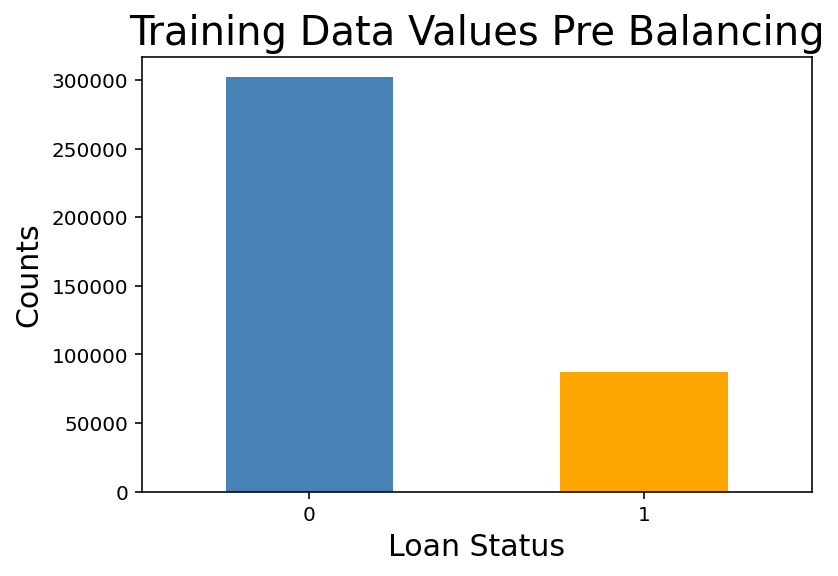

In [36]:
y_train_fully_paid = pd.Series(y_train).value_counts().sort_values(ascending = False)[0]
y_train_charged_off = pd.Series(y_train).value_counts().sort_values(ascending = False)[1]

# checking the new counts
print("Number transactions before balancing X_train dataset: ", X_train_sc.shape)
print(f'Fully Paid: {y_train_fully_paid}')
print(f'Defaulted: {y_train_charged_off}')

# observe that data has been balanced in training data
pd.Series(y_train).value_counts().sort_values(ascending = False).plot.bar(color = ['steelblue', 'orange'])
plt.title('Training Data Values Pre Balancing', size = 20)
plt.ylabel('Counts', size = 15)
plt.xlabel('Loan Status', size = 15, rotation = 0)
plt.xticks(rotation = 0);

Number transactions after balancing X_train dataset:  (603672, 14)


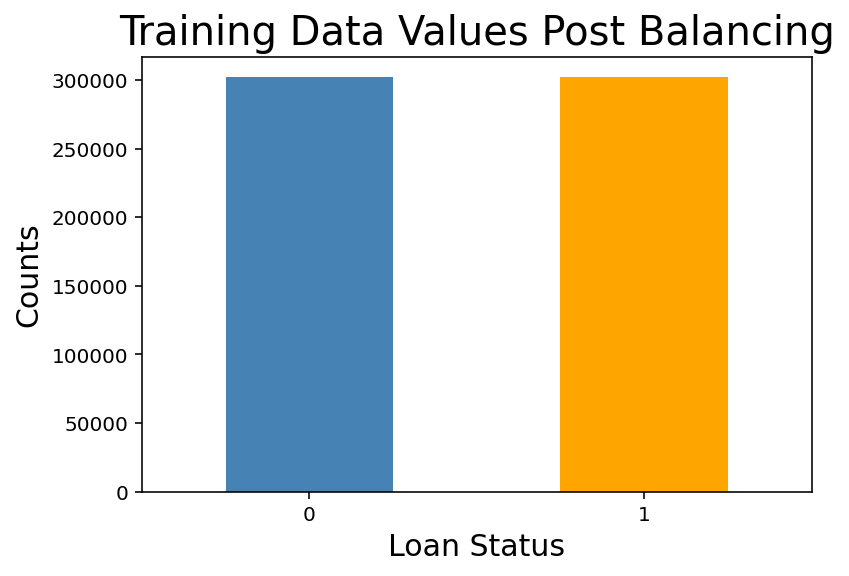

In [37]:
# instantiating SMOTE
sm = SMOTE(random_state = 42)
# fitting the scaled train data
X_train_new, y_train_new = sm.fit_sample(X_train_sc, y_train.ravel())

# checking the new counts
print("Number transactions after balancing X_train dataset: ", X_train_new.shape)

# observe that data has been balanced in training data
pd.Series(y_train_new).value_counts().sort_values(ascending = False).plot.bar(color = ['steelblue', 'orange'])
plt.title('Training Data Values Post Balancing', size = 20)
plt.ylabel('Counts', size = 15)
plt.xlabel('Loan Status', size = 15)
plt.xticks(rotation = 0);

In [43]:
pd.Series(y_train_new).value_counts()

0    301836
1    301836
dtype: int64